In [ ]:
from google.colab import drive
import os
import random
import matplotlib.pyplot as plt
import cv2
import math

In [ ]:
drive.mount("/content/my_drive", force_remount=True)

Mounted at /content/my_drive


In [ ]:
os.chdir("/content")

In [ ]:
!git clone https://github.com/xiaohuicui/WAID.git

fatal: destination path 'WAID' already exists and is not an empty directory.


In [ ]:
img_path="/content/WAID/WAID/images"
label_path="/content/WAID/WAID/labels"
classes_path="/content/WAID/WAID/classes.txt"
with open(classes_path,"r") as f:
  classes=f.read()

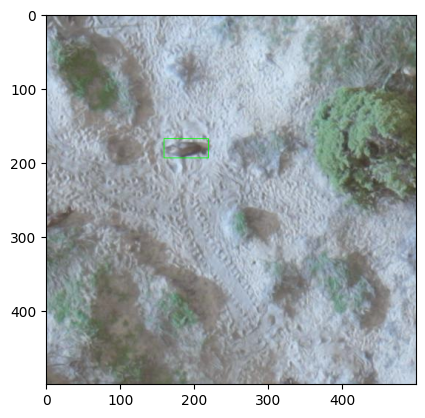

In [ ]:
def random_view(img_path,label_path,name):
  name_image_path=os.path.join(img_path,name)
  name_label_path=os.path.join(label_path,name)
  img_name=random.choice(os.listdir(name_image_path))
  img=cv2.imread(os.path.join(name_image_path,img_name))
  label_name=img_name[:-3]+"txt"
  label=os.path.join(name_label_path,label_name)
  with open(label,"r") as f:
    a=f.read()

  img_shape=img.shape
  for i in a.split("\n"):
    if i!="":
      classs,xc,yc,w,h=map(float,i.split(" "))
      x1=round((xc-w/2)*img_shape[1])
      x2=round((xc+w/2)*img_shape[1])
      y1=round((yc-h/2)*img_shape[0])
      y2=round((yc+h/2)*img_shape[0])
      cv2.rectangle(img,(x1,y1),(x2,y2),thickness=1,color=(0,255,0))

      classs=int(classs)

  plt.imshow(img)
  plt.show()

random_view(img_path,label_path,"train")

In [ ]:
os.makedirs("/content/my_drive/MyDrive/yolo",exist_ok=True)
os.chdir("/content/my_drive/MyDrive/yolo")

In [ ]:
## run this only one time than comment this
# !git clone https://github.com/ultralytics/yolov5

In [ ]:
os.chdir("/content/my_drive/MyDrive/yolo/yolov5")

In [ ]:
!ls

benchmarks.py	 data	    hubconf.py	 pyproject.toml    runs		   utils
CITATION.cff	 data.yaml  LICENSE	 README.md	   segment	   val.py
classify	 detect.py  models	 README.zh-CN.md   train.py	   yolov5s.pt
CONTRIBUTING.md  export.py  __pycache__  requirements.txt  tutorial.ipynb


In [ ]:
pip install -r requirements.txt

In [ ]:
!python train.py --data data.yaml --cfg yolov5s.yaml --batch-size 8 --name Model --epochs 15

2024-06-12 12:33:03.364342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 12:33:03.364418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 12:33:03.466796: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=F

In [ ]:
!python export.py --weights runs/train/Model2/weights/best.pt --include onnx --simplify --opset 12

export: data=data/coco128.yaml, weights=['runs/train/Model2/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=True, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/Model2/weights/best.pt with output shape (1, 25200, 11) (13.8 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 123.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.5s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting e

In [ ]:
!python export.py --weights runs/train/Model3/weights/best.pt --include onnx --simplify --opset 12

export: data=data/coco128.yaml, weights=['runs/train/Model3/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=True, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/Model3/weights/best.pt with output shape (1, 25200, 11) (54.3 MB)

ONNX: starting export with onnx 1.16.1...
ONNX: simplifying with onnx-simplifier 0.4.36...
ONNX: export success ✅ 4.7s, saved as runs/train/Model3/weights/best.onnx (27.2 MB)

Export complete (14.8s)
Results saved to /content/my_drive/MyDrive/yolo/yolov5/runs/train/Model3/weights
Detect:          python detect.py --weights runs/train/Model3/weigh

In [ ]:
!python val.py --weights runs/train/Model2/weights/best.onnx --data data.yaml

val: data=data.yaml, weights=['runs/train/Model2/weights/best.onnx'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CPU

Loading runs/train/Model2/weights/best.onnx for ONNX Runtime inference...
Forcing --batch-size 1 square inference (1,3,640,640) for non-PyTorch models
100% 755k/755k [00:00<00:00, 32.9MB/s]
val: Scanning /content/WAID/WAID/labels/valid... 2873 images, 0 backgrounds, 0 corrupt: 100% 2873/2873 [00:04<00:00, 594.78it/s] 
val: New cache created: /content/WAID/WAID/labels/valid.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2873/2873 [19:59<00:00,  2.40it/s]
                   all       2873      46703      0.904      0.883 

In [ ]:
!python val.py --weights runs/train/Model3/weights/best.onnx --data data.yaml

val: data=data.yaml, weights=['runs/train/Model3/weights/best.onnx'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CPU

Loading runs/train/Model3/weights/best.onnx for ONNX Runtime inference...
Forcing --batch-size 1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/WAID/WAID/labels/valid.cache... 2873 images, 0 backgrounds, 0 corrupt: 100% 2873/2873 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2873/2873 [20:10<00:00,  2.37it/s]
                   all       2873      46703      0.887      0.863      0.915      0.511
                 sheep       2873      26063      0.943      0.922      0.962      